# Brute force

Here we implement a brute force algorithm to solve any instance
of either the SP or the TSP.

In [1]:
from timeit import timeit

import numpy as np
from sympy.utilities.iterables import multiset_permutations
import matplotlib.pyplot as plt

from utils import random_sp, phi

In [2]:
def brute_force(p, measure):
    initial = np.array(p)
    m = measure(initial)
    solution = initial
    for maybe_solution in multiset_permutations(initial):
        maybe_m = measure(maybe_solution)
        if maybe_m < m:
            solution = maybe_solution
            m = maybe_m
    return solution

Let us try this with up to 11 numbers to sort

In [3]:
def brute_random(n):
    points = []
    for c in range(1, n):
        sp = random_sp(c)
        t = timeit(lambda: print(f"Result for random problem with n = {c}: {brute_force(sp, phi)}"), number=1)
        points.append(t)
    plt.plot(points)
    plt.show()

Result for random problem with n = 1: [0.87684194]
Result for random problem with n = 2: [0.02894416 0.44307864]
Result for random problem with n = 3: [0.063974776938865, 0.12417791818947244, 0.7278660194713104]
Result for random problem with n = 4: [0.12137776973310066, 0.20662431430627937, 0.3492832458080235, 0.9697239972647259]
Result for random problem with n = 5: [0.08283156406571046, 0.43092371680199026, 0.5093626041336652, 0.5961258405222577, 0.9800616677813692]
Result for random problem with n = 6: [0.008431745081934006, 0.6054486408562221, 0.9165554287156302, 0.9317297445654098, 0.9520329681383124, 0.985951411602781]
Result for random problem with n = 7: [0.2668102240619874, 0.2911035032902516, 0.3214187607903738, 0.48308186276403053, 0.49120712212191064, 0.6919571435596985, 0.9577299843630782]
Result for random problem with n = 8: [0.1684627819438771, 0.30713966027446615, 0.38600128229013353, 0.6012866804497118, 0.6387004484460119, 0.7919057416762834, 0.8955364372949512, 0.89

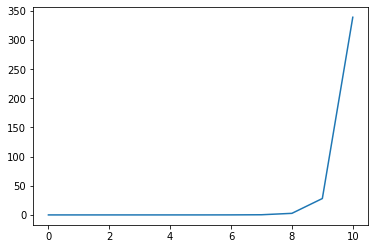

In [4]:
brute_random(12)

So sorting 12 elements with this algorithm would take my system around an hour. Impractical, to say the least.
Finding slutions for the TSP would be equally expensive.